# UCI Heart Disease Data Set

---


### Data Source : https://archive.ics.uci.edu/ml/datasets/Heart+Disease  

---  

# **Objective :** To find Trends in heart data to predict certain Cardio Vascular events or to find any clear indications of heart health.

# **Data Set Information:** There are four dataset available from these Institues/Hospitals.  
1. **Hungarian :** Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D
2. **Switzerland :** 
  - University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
  - University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
3. **V.A :** V.A Medical Center: Robert Detrano, M.D., Ph.D.
4. **Cleveland :** Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.  

# **Metrics :**  

Reference : https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9  


**Precision and Recall**  
  - Precision  
  We can see that Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. 
    
  ![Title](https://miro.medium.com/max/593/1*HGd3_eAJ3-PlDQvn-xDRdg.png)  
  The denominator is actually the Total Predicted Positive! So the formula becomes
  ![Title](https://miro.medium.com/max/950/1*PULzWEven_XAZjiMNizDCg.png)  
  
  True Positive + False Positive = Total Predicted Positive  

  ![Title](https://miro.medium.com/max/555/1*C3ctNdO0mde9fa1PFsCVqA.png)  

  Precision is a good measure to determine, when the costs of **False Positive** is high.  
  For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.  

  - Recall  
  Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).  

  ![Title](https://miro.medium.com/max/523/1*dXkDleGhA-jjZmZ1BlYKXg.png)  

  ![Title](https://miro.medium.com/max/950/1*BBhWQC-m0CLN4sVJ0h5fJQ.jpeg)  

  Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with **False Negative**.  

  For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.  

  Similarly, **in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.**  
<br>  

**F1 Score**  
F1 is a function of Precision and Recall. Looking at Wikipedia, the formula is as follows:  
![Title](https://miro.medium.com/max/353/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)  
  
  F1 Score is needed when we want to seek a balance between Precision and Recall.


So we will be evaluating following metrics for this problem    
**- Recall score**  
**- F1-Score**  
**- Model Interpretability**
<br>  
<br>  



# Features

|SR. No|Parameter Name|New meaningful Name|Description/Values|
|------|--------------|-------------------|------------------|
|1.| age|Patient_Age|Age in years|
|2.| sex|Patient_Gender|Gender (1 = Male; 0 = Female)|
|3.| cp |Chest_Pain_Type|Value 1: typical angina   
||||Value 2: atypical angina|  
||||Value 3: non-anginal pain|  
||||Value 4: asymptomatic|
|4.| trestbps|Patient_Resting_Blood_Pressure |Resting BP on admission to the hospital| 
|5.| chol |Serum_Cholestoral (In mg/dl)||
|6.| fbs |Fasting_Blood_Sugar|
||||Value 1 = true if > 120 mg/dl|
||||Value 0 = false if <= 120 mg/dl|
|7.| restecg|Resting_ECG|Resting electrocardiographic results
||||Value 0: normal
||||Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
||||Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
|8.| thalach| - Maximum_Heart_Rate_Achieved|Maximum heart rate during Thalium Stress Test|
|9.| exang|Exercise_Induced_Angina| Values are|
||||Value 1 = yes|
||||Value 0 = no|
|10.| oldpeak |Old_Peak |ST depression induced by exercise relative to rest|
|11.| slope |Slope|the slope of the peak exercise ST segment|
||||Value 1: upsloping|
||||Value 2: flat|
||||Value 3: downsloping|
|12.| ca|No_of_Major_Colored_Vessels|number of major vessels (0-3) colored by flourosopy|
|13.| thal|Thalium_Stress_Test_Results|Values are|
||||Value 3 = normal|
||||Value 6 = fixed defect|
||||Value 7 = reversable defect|
|14.| num |Heart_Disease_Status| Angiographic disease status|
||||Value 0: < 50% diameter narrowing|
||||Value 1: > 50% diameter narrowing|
||||number of major vessels with >50% narrowing (0,1,2,3, or 4)|

In [1]:
!pip install catboost

     |████████████████████████████████| 63.6MB 126kB/s 


## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import sklearn

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option("display.max_columns", 2000)

# Seaborn for visualization
import seaborn as sns

#sns.set(style="white", context="notebook", palette="deep")
sns.set_style("whitegrid")

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data splitting/parameter tuning
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# RandomForest
from sklearn.ensemble import RandomForestClassifier

# catboost
import catboost as cbst

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Preprocessing
from sklearn.preprocessing import minmax_scale

# Metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

import platform
import matplotlib
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

from collections import Counter

# Ignore only Future and Deprecation warnings

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

### Used Library Information

In [3]:
# Get all version information
print("The python version is {}.".format(platform.python_version()))
print("The numpy version is {}.".format(np.__version__))
print("The pandas version is {}.".format(pd.__version__))
print("The scikit-learn version is {}.".format(sklearn.__version__))
print("The matplotlib version is {}.".format(matplotlib.__version__))
print("The seaborn version is {}.".format(sns.__version__))

The python version is 3.6.9.
The numpy version is 1.17.4.
The pandas version is 0.25.3.
The scikit-learn version is 0.21.3.
The matplotlib version is 3.1.2.
The seaborn version is 0.9.0.


#### Connect to google drive for accessing the dataset

In [4]:
from google.colab import drive
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [5]:
!ls /content/gdrive/My\ Drive/ColabNotebooks/Heart_Disease_UCI/data_set

cleve.mod	     processed.cleveland.data  processed.switzerland.data
heart-disease.names  processed.hungarian.data  processed.va.data


In [0]:
# Path of Dataset

DATASET_AND_OUTPUT_PATH = "/content/gdrive/My Drive/ColabNotebooks/Heart_Disease_UCI/data_set/"
CLEVELAND_DATA_FILE  = "processed.cleveland.data"
CH_DATA_FILE = "processed.switzerland.data"
HUNGRY_DATA_FILE = "processed.hungarian.data"
VA_DATA_FILE = "processed.va.data"

### Funcltion to print total missing values for a feature as well as respective percentage

In [0]:
def percent_missing(InDf):
  """
  To print total missing values for all feature as well as respective percentage
  """
  print("Shape of dataframe", InDf.shape)
  total = InDf.isnull().sum().sort_values(ascending = False)
  percent = round((InDf.isnull().sum()/InDf.isnull().count()*100).sort_values(ascending = False),2)
  missingDf  = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
  
  return missingDf

#### Display unique values from selected features

In [0]:
def display_unique_feature_values(In_df):
  """
  Display unique values from selected features.
  """
  print("Categorical parameter values :")
  print("******************************")
  for col in In_df.columns:
    if In_df[col].dtype.name == "category":
      print(f"Feature Name : {In_df[col].name} Unique Value : {In_df[col].unique()}\n")
  print("\n")
  print("Non-Categorical parameter values :")
  print("**********************************")
  print(f'Feature Name : {In_df["No_of_Major_Colored_Vessels"].name} Unique Value : {In_df["No_of_Major_Colored_Vessels"].unique()}\n')


#### Wrapper function to change data type

In [0]:
def change_data_type(In_df):
  """
  Wrapper function to change data type
  """
  In_df = In_df.astype({ "Patient_Age": "int8", "Patient_Gender": "category",\
                        "Chest_Pain_Type": "category", \
                        "Patient_Resting_Blood_Pressure": "float64", \
                        "Serum_Cholestoral": "float64", \
                        "Fasting_Blood_Sugar": "category", \
                        "Resting_ECG": "category",\
                        "Maximum_Heart_Rate_Achieved": "float64", \
                        "Exercise_Induced_Angina": "category", \
                        "Old_Peak": "float64", "Slope": "category", \
                        "No_of_Major_Colored_Vessels": "float", \
                        "Thalium_Stress_Test_Result": "category",\
                        "Heart_Disease_Status": "category"})
  return In_df

# Data Exploration

## Glimpse of all data files

In [10]:
# Cleveland Data

!head -n 5 /content/gdrive/My\ Drive/ColabNotebooks/Heart_Disease_UCI/data_set/processed.cleveland.data

63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
# Switzerland Data

!head -n 5 /content/gdrive/My\ Drive/ColabNotebooks/Heart_Disease_UCI/data_set/processed.switzerland.data

32,1,1,95,0,?,0,127,0,.7,1,?,?,1
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
36,1,4,110,0,?,0,125,1,1,2,?,6,1
38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [12]:
# Hungarian Data

!head -n 5 /content/gdrive/My\ Drive/ColabNotebooks/Heart_Disease_UCI/data_set/processed.hungarian.data

28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0


In [13]:
# Virginia Data

!head -n 5 /content/gdrive/My\ Drive/ColabNotebooks/Heart_Disease_UCI/data_set/processed.va.data

63,1,4,140,260,0,1,112,1,3,2,?,?,2
44,1,4,130,209,0,1,127,0,0,?,?,?,0
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


**Summary_1 :** All four data files are in csv format.  
**Summary_2 :** All four data files have 14 features.

### Cleveland Data

Convert data file into dataframe with meaningful feature names

In [14]:
cland_df = pd.read_csv(DATASET_AND_OUTPUT_PATH+CLEVELAND_DATA_FILE, names=[\
          "Patient_Age", "Patient_Gender", "Chest_Pain_Type", \
          "Patient_Resting_Blood_Pressure","Serum_Cholestoral",\
          "Fasting_Blood_Sugar", "Resting_ECG", "Maximum_Heart_Rate_Achieved",\
          "Exercise_Induced_Angina", "Old_Peak", "Slope",\
          "No_of_Major_Colored_Vessels", "Thalium_Stress_Test_Result", \
          "Heart_Disease_Status"])
cland_df.head()

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Impute unknown values with NaN

In [0]:
cland_df = cland_df.replace("?", np.nan)

In [16]:
cland_df.isna().any()

Patient_Age                       False
Patient_Gender                    False
Chest_Pain_Type                   False
Patient_Resting_Blood_Pressure    False
Serum_Cholestoral                 False
Fasting_Blood_Sugar               False
Resting_ECG                       False
Maximum_Heart_Rate_Achieved       False
Exercise_Induced_Angina           False
Old_Peak                          False
Slope                             False
No_of_Major_Colored_Vessels        True
Thalium_Stress_Test_Result         True
Heart_Disease_Status              False
dtype: bool

In [17]:
cland_df.dtypes

Patient_Age                       float64
Patient_Gender                    float64
Chest_Pain_Type                   float64
Patient_Resting_Blood_Pressure    float64
Serum_Cholestoral                 float64
Fasting_Blood_Sugar               float64
Resting_ECG                       float64
Maximum_Heart_Rate_Achieved       float64
Exercise_Induced_Angina           float64
Old_Peak                          float64
Slope                             float64
No_of_Major_Colored_Vessels        object
Thalium_Stress_Test_Result         object
Heart_Disease_Status                int64
dtype: object

Change data type to "category" whereever required

In [0]:
cland_df = change_data_type(cland_df)

In [19]:
cland_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels        float64
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

### Switzerland Data

Convert data file into dataframe with meaningful feature names

In [20]:
ch_df = pd.read_csv(DATASET_AND_OUTPUT_PATH+CH_DATA_FILE, names=[\
          "Patient_Age", "Patient_Gender", "Chest_Pain_Type", \
          "Patient_Resting_Blood_Pressure","Serum_Cholestoral",\
          "Fasting_Blood_Sugar", "Resting_ECG", "Maximum_Heart_Rate_Achieved",\
          "Exercise_Induced_Angina", "Old_Peak", "Slope",\
          "No_of_Major_Colored_Vessels", "Thalium_Stress_Test_Result", \
          "Heart_Disease_Status"])
ch_df.head()

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [21]:
ch_df.dtypes

Patient_Age                        int64
Patient_Gender                     int64
Chest_Pain_Type                    int64
Patient_Resting_Blood_Pressure    object
Serum_Cholestoral                  int64
Fasting_Blood_Sugar               object
Resting_ECG                       object
Maximum_Heart_Rate_Achieved       object
Exercise_Induced_Angina           object
Old_Peak                          object
Slope                             object
No_of_Major_Colored_Vessels       object
Thalium_Stress_Test_Result        object
Heart_Disease_Status               int64
dtype: object

Impute unknown values with NaN

In [22]:
ch_df = ch_df.replace("?", np.nan)
ch_df.isna().any()

Patient_Age                       False
Patient_Gender                    False
Chest_Pain_Type                   False
Patient_Resting_Blood_Pressure     True
Serum_Cholestoral                 False
Fasting_Blood_Sugar                True
Resting_ECG                        True
Maximum_Heart_Rate_Achieved        True
Exercise_Induced_Angina            True
Old_Peak                           True
Slope                              True
No_of_Major_Colored_Vessels        True
Thalium_Stress_Test_Result         True
Heart_Disease_Status              False
dtype: bool

Change data type to "category" whereever required

In [23]:
ch_df = change_data_type(ch_df)
ch_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels        float64
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

### Hungarian Data

Convert data file into dataframe with meaningful feature names

In [24]:
# Hungarian
hungarian_df = pd.read_csv(DATASET_AND_OUTPUT_PATH+HUNGRY_DATA_FILE, names=[\
          "Patient_Age", "Patient_Gender", "Chest_Pain_Type", \
          "Patient_Resting_Blood_Pressure","Serum_Cholestoral",\
          "Fasting_Blood_Sugar", "Resting_ECG", "Maximum_Heart_Rate_Achieved",\
          "Exercise_Induced_Angina", "Old_Peak", "Slope",\
          "No_of_Major_Colored_Vessels", "Thalium_Stress_Test_Result", \
          "Heart_Disease_Status"])
hungarian_df.head()

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [25]:
hungarian_df.dtypes

Patient_Age                         int64
Patient_Gender                      int64
Chest_Pain_Type                     int64
Patient_Resting_Blood_Pressure     object
Serum_Cholestoral                  object
Fasting_Blood_Sugar                object
Resting_ECG                        object
Maximum_Heart_Rate_Achieved        object
Exercise_Induced_Angina            object
Old_Peak                          float64
Slope                              object
No_of_Major_Colored_Vessels        object
Thalium_Stress_Test_Result         object
Heart_Disease_Status                int64
dtype: object

Impute unknown values with NaN

In [26]:
hungarian_df = hungarian_df.replace("?", np.nan)
hungarian_df.isna().any()

Patient_Age                       False
Patient_Gender                    False
Chest_Pain_Type                   False
Patient_Resting_Blood_Pressure     True
Serum_Cholestoral                  True
Fasting_Blood_Sugar                True
Resting_ECG                        True
Maximum_Heart_Rate_Achieved        True
Exercise_Induced_Angina            True
Old_Peak                          False
Slope                              True
No_of_Major_Colored_Vessels        True
Thalium_Stress_Test_Result         True
Heart_Disease_Status              False
dtype: bool

Change data type to "category" whereever required

In [27]:
hungarian_df = change_data_type(hungarian_df)
hungarian_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels        float64
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

### Virginia Data

Convert data file into dataframe with meaningful feature names

In [28]:
va_df = pd.read_csv(DATASET_AND_OUTPUT_PATH+VA_DATA_FILE, names=[\
          "Patient_Age", "Patient_Gender", "Chest_Pain_Type", \
          "Patient_Resting_Blood_Pressure","Serum_Cholestoral",\
          "Fasting_Blood_Sugar", "Resting_ECG", "Maximum_Heart_Rate_Achieved",\
          "Exercise_Induced_Angina", "Old_Peak", "Slope",\
          "No_of_Major_Colored_Vessels", "Thalium_Stress_Test_Result", \
          "Heart_Disease_Status"])
va_df.head()

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [29]:
va_df.dtypes

Patient_Age                        int64
Patient_Gender                     int64
Chest_Pain_Type                    int64
Patient_Resting_Blood_Pressure    object
Serum_Cholestoral                 object
Fasting_Blood_Sugar               object
Resting_ECG                        int64
Maximum_Heart_Rate_Achieved       object
Exercise_Induced_Angina           object
Old_Peak                          object
Slope                             object
No_of_Major_Colored_Vessels       object
Thalium_Stress_Test_Result        object
Heart_Disease_Status               int64
dtype: object

Impute unknown values with NaN

In [30]:
va_df = va_df.replace("?", np.nan)
va_df.isna().any()

Patient_Age                       False
Patient_Gender                    False
Chest_Pain_Type                   False
Patient_Resting_Blood_Pressure     True
Serum_Cholestoral                  True
Fasting_Blood_Sugar                True
Resting_ECG                       False
Maximum_Heart_Rate_Achieved        True
Exercise_Induced_Angina            True
Old_Peak                           True
Slope                              True
No_of_Major_Colored_Vessels        True
Thalium_Stress_Test_Result         True
Heart_Disease_Status              False
dtype: bool

Change data type to "category" whereever required

In [31]:
va_df = change_data_type(va_df)
va_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels        float64
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

### Analyse of all unique parameter values in all four datasets

In [32]:
print("Cleveland Data : ")
print("*"*16)
display_unique_feature_values(cland_df)

Cleveland Data : 
****************
Categorical parameter values :
******************************
Feature Name : Patient_Gender Unique Value : [1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

Feature Name : Chest_Pain_Type Unique Value : [1.0, 4.0, 3.0, 2.0]
Categories (4, float64): [1.0, 4.0, 3.0, 2.0]

Feature Name : Fasting_Blood_Sugar Unique Value : [1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

Feature Name : Resting_ECG Unique Value : [2.0, 0.0, 1.0]
Categories (3, float64): [2.0, 0.0, 1.0]

Feature Name : Exercise_Induced_Angina Unique Value : [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]

Feature Name : Slope Unique Value : [3.0, 2.0, 1.0]
Categories (3, float64): [3.0, 2.0, 1.0]

Feature Name : Thalium_Stress_Test_Result Unique Value : [6.0, 3.0, 7.0, NaN]
Categories (3, object): [6.0, 3.0, 7.0]

Feature Name : Heart_Disease_Status Unique Value : [0, 2, 1, 3, 4]
Categories (5, int64): [0, 2, 1, 3, 4]



Non-Categorical parameter values :
**********************************
Feat

In [33]:
print("Switzerland Data : ")
print("*"*18)
display_unique_feature_values(ch_df)

Switzerland Data : 
******************
Categorical parameter values :
******************************
Feature Name : Patient_Gender Unique Value : [1, 0]
Categories (2, int64): [1, 0]

Feature Name : Chest_Pain_Type Unique Value : [1, 4, 3, 2]
Categories (4, int64): [1, 4, 3, 2]

Feature Name : Fasting_Blood_Sugar Unique Value : [NaN, 0, 1]
Categories (2, object): [0, 1]

Feature Name : Resting_ECG Unique Value : [0, NaN, 1, 2]
Categories (3, object): [0, 1, 2]

Feature Name : Exercise_Induced_Angina Unique Value : [0, 1, NaN]
Categories (2, object): [0, 1]

Feature Name : Slope Unique Value : [1, NaN, 2, 3]
Categories (3, object): [1, 2, 3]

Feature Name : Thalium_Stress_Test_Result Unique Value : [NaN, 7, 6, 3]
Categories (3, object): [7, 6, 3]

Feature Name : Heart_Disease_Status Unique Value : [1, 3, 2, 0, 4]
Categories (5, int64): [1, 3, 2, 0, 4]



Non-Categorical parameter values :
**********************************
Feature Name : No_of_Major_Colored_Vessels Unique Value : [nan  

In [34]:
print("Hungarian Data : ")
print("*"*16)
display_unique_feature_values(hungarian_df)

Hungarian Data : 
****************
Categorical parameter values :
******************************
Feature Name : Patient_Gender Unique Value : [1, 0]
Categories (2, int64): [1, 0]

Feature Name : Chest_Pain_Type Unique Value : [2, 1, 3, 4]
Categories (4, int64): [2, 1, 3, 4]

Feature Name : Fasting_Blood_Sugar Unique Value : [0, NaN, 1]
Categories (2, object): [0, 1]

Feature Name : Resting_ECG Unique Value : [2, 0, 1, NaN]
Categories (3, object): [2, 0, 1]

Feature Name : Exercise_Induced_Angina Unique Value : [0, 1, NaN]
Categories (2, object): [0, 1]

Feature Name : Slope Unique Value : [NaN, 2, 1, 3]
Categories (3, object): [2, 1, 3]

Feature Name : Thalium_Stress_Test_Result Unique Value : [NaN, 6, 3, 7]
Categories (3, object): [6, 3, 7]

Feature Name : Heart_Disease_Status Unique Value : [0, 1]
Categories (2, int64): [0, 1]



Non-Categorical parameter values :
**********************************
Feature Name : No_of_Major_Colored_Vessels Unique Value : [nan  0.]



In [35]:
print("Virginia Data : ")
print("*"*15)
display_unique_feature_values(va_df)

Virginia Data : 
***************
Categorical parameter values :
******************************
Feature Name : Patient_Gender Unique Value : [1, 0]
Categories (2, int64): [1, 0]

Feature Name : Chest_Pain_Type Unique Value : [4, 3, 2, 1]
Categories (4, int64): [4, 3, 2, 1]

Feature Name : Fasting_Blood_Sugar Unique Value : [0, 1, NaN]
Categories (2, object): [0, 1]

Feature Name : Resting_ECG Unique Value : [1, 2, 0]
Categories (3, int64): [1, 2, 0]

Feature Name : Exercise_Induced_Angina Unique Value : [1, 0, NaN]
Categories (2, object): [1, 0]

Feature Name : Slope Unique Value : [2, NaN, 3, 1]
Categories (3, object): [2, 3, 1]

Feature Name : Thalium_Stress_Test_Result Unique Value : [NaN, 3, 7, 6]
Categories (3, object): [3, 7, 6]

Feature Name : Heart_Disease_Status Unique Value : [2, 0, 1, 3, 4]
Categories (5, int64): [2, 0, 1, 3, 4]



Non-Categorical parameter values :
**********************************
Feature Name : No_of_Major_Colored_Vessels Unique Value : [nan  0.]



 **Summary_3 :** Hungarian dataset has only two values (0 & 1) for "Heart_Disease_Status" target variable. While all remaining three dataset has four (0,1,2,3) values.  
**Summary_4 :** Switzerland dataset has only 3 values for "No_of_Major_Colored_Vessels".  
**Summary_5 :** Hungarian dataset has only 2 values for "No_of_Major_Colored_Vessels".  
**Summary_6 :** Virginia dataset has only 1 value for "No_of_Major_Colored_Vessels".


### Check missing data percentage in all the four datasets

In [36]:
# Cleveland data

percent_missing(cland_df)

Shape of dataframe (303, 14)


,Total,Percent
No_of_Major_Colored_Vessels,4,1.32
Thalium_Stress_Test_Result,2,0.66
Heart_Disease_Status,0,0.00
Slope,0,0.00
Old_Peak,0,0.00
Exercise_Induced_Angina,0,0.00
Maximum_Heart_Rate_Achieved,0,0.00
Resting_ECG,0,0.00
Fasting_Blood_Sugar,0,0.00
Serum_Cholestoral,0,0.00


In [37]:
# Switzerland data
percent_missing(ch_df)

Shape of dataframe (123, 14)


,Total,Percent
No_of_Major_Colored_Vessels,118,95.93
Fasting_Blood_Sugar,75,60.98
Thalium_Stress_Test_Result,52,42.28
Slope,17,13.82
Old_Peak,6,4.88
Patient_Resting_Blood_Pressure,2,1.63
Exercise_Induced_Angina,1,0.81
Maximum_Heart_Rate_Achieved,1,0.81
Resting_ECG,1,0.81
Heart_Disease_Status,0,0.00


In [38]:
# Hungarian data
percent_missing(hungarian_df)

Shape of dataframe (294, 14)


,Total,Percent
No_of_Major_Colored_Vessels,291,98.98
Thalium_Stress_Test_Result,266,90.48
Slope,190,64.63
Serum_Cholestoral,23,7.82
Fasting_Blood_Sugar,8,2.72
Exercise_Induced_Angina,1,0.34
Maximum_Heart_Rate_Achieved,1,0.34
Resting_ECG,1,0.34
Patient_Resting_Blood_Pressure,1,0.34
Heart_Disease_Status,0,0.00


In [39]:
# Virginia data
percent_missing(va_df)

Shape of dataframe (200, 14)


,Total,Percent
No_of_Major_Colored_Vessels,198,99.0
Thalium_Stress_Test_Result,166,83.0
Slope,102,51.0
Old_Peak,56,28.0
Patient_Resting_Blood_Pressure,56,28.0
Exercise_Induced_Angina,53,26.5
Maximum_Heart_Rate_Achieved,53,26.5
Fasting_Blood_Sugar,7,3.5
Serum_Cholestoral,7,3.5
Heart_Disease_Status,0,0.0


Reviewing default missing data e.g. many times missing data is imputed as -999 or -9, so using dataframe.describe, analysing minimum/maximum values.

In [40]:
cland_df.describe()

,Patient_Age,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Maximum_Heart_Rate_Achieved,Old_Peak,No_of_Major_Colored_Vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [41]:
ch_df.describe()

,Patient_Age,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Maximum_Heart_Rate_Achieved,Old_Peak,No_of_Major_Colored_Vessels
count,123.000000,121.000000,123.0,122.000000,117.000000,5.000000
mean,55.317073,130.206612,0.0,121.557377,0.653846,1.600000
std,9.032108,22.559151,0.0,25.977438,1.056061,0.547723
min,32.000000,80.000000,0.0,60.000000,-2.600000,1.000000
25%,51.000000,115.000000,0.0,104.250000,0.000000,1.000000
50%,56.000000,125.000000,0.0,121.000000,0.300000,2.000000
75%,61.500000,145.000000,0.0,140.000000,1.500000,2.000000
max,74.000000,200.000000,0.0,182.000000,3.700000,2.000000


In [42]:
hungarian_df.describe()

,Patient_Age,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Maximum_Heart_Rate_Achieved,Old_Peak,No_of_Major_Colored_Vessels
count,294.000000,293.000000,271.000000,293.000000,294.000000,3.0
mean,47.826531,132.583618,250.848708,139.129693,0.586054,0.0
std,7.811812,17.626568,67.657711,23.589749,0.908648,0.0
min,28.000000,92.000000,85.000000,82.000000,0.000000,0.0
25%,42.000000,120.000000,209.000000,122.000000,0.000000,0.0
50%,49.000000,130.000000,243.000000,140.000000,0.000000,0.0
75%,54.000000,140.000000,282.500000,155.000000,1.000000,0.0
max,66.000000,200.000000,603.000000,190.000000,5.000000,0.0


In [43]:
va_df.describe()

,Patient_Age,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Maximum_Heart_Rate_Achieved,Old_Peak,No_of_Major_Colored_Vessels
count,200.000000,144.000000,193.000000,147.000000,144.000000,2.0
mean,59.350000,133.763889,178.746114,122.795918,1.320833,0.0
std,7.811697,21.537733,114.035232,21.990328,1.106236,0.0
min,35.000000,0.000000,0.000000,69.000000,-0.500000,0.0
25%,55.000000,120.000000,0.000000,109.000000,0.000000,0.0
50%,60.000000,130.000000,216.000000,120.000000,1.500000,0.0
75%,64.000000,147.000000,258.000000,140.000000,2.000000,0.0
max,77.000000,190.000000,458.000000,180.000000,4.000000,0.0


In [44]:
cland_df[["No_of_Major_Colored_Vessels","Heart_Disease_Status"]].pivot_table(index="No_of_Major_Colored_Vessels", columns="Heart_Disease_Status", 
                        aggfunc=len, fill_value=0)

Heart_Disease_Status,0,1,2,3,4
No_of_Major_Colored_Vessels,,,,,
0.0,130,26,9,8,3
1.0,21,19,14,8,3
2.0,7,6,9,14,2
3.0,3,3,4,5,5


In [45]:
cland_df[["Thalium_Stress_Test_Result","Heart_Disease_Status"]].pivot_table(index="Thalium_Stress_Test_Result", columns="Heart_Disease_Status", 
                        aggfunc=len, fill_value=0)

Heart_Disease_Status,0,1,2,3,4
Thalium_Stress_Test_Result,,,,,
3.0,129,22,7,6,2
6.0,6,3,6,1,2
7.0,28,30,22,28,9


In [46]:
va_df[["Thalium_Stress_Test_Result","Heart_Disease_Status"]].pivot_table(index="Thalium_Stress_Test_Result", columns="Heart_Disease_Status", 
                        aggfunc=len, fill_value=0)

Heart_Disease_Status,0,1,2,3
Thalium_Stress_Test_Result,,,,
3,2,1,1,0
6,1,2,4,1
7,5,12,3,2


In [47]:
va_df[["No_of_Major_Colored_Vessels","Heart_Disease_Status"]].pivot_table(index="No_of_Major_Colored_Vessels", columns="Heart_Disease_Status", 
                        aggfunc=len, fill_value=0)

Heart_Disease_Status,0,1
No_of_Major_Colored_Vessels,,
0.0,1,1


**Summary_7 :** Initial Idea was to use unprocessed data i.e. cleveland.data and all. As per Warning file, present at (https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) **cleveland.data** appears to be corrupted, so we will be using processed.cleveland.data and similar files from Switzerland, Hungry and VA.

**Summary_8 :** Since we are using processed.*.data files, so we will be concentrating only on 13+! features.

**Summary_9 :** As per above analysis of Switzerland, Hungarian and VA data analysis, we found features like **No_of_Major_Colored_Vessels**, **Thalium_Stress_Test_Result**, **Fasting_Blood_Sugar**, and **slope** have major missing values upto 99%. As we can not impute these features with 70-99% missing values, so we can not use these datasets.

**Summary_10 :** My approach will be to use processed.cleveland.data first and try to figure out important parameters out of existing 13 independent features. 

**Summary_11 :** Since size of cleveland data is very small only 303 records, so we will be dividing the **Heart_Disease_Status** into two categories e.g. 0 - Healthy and 1 - Not Healthy. It means if any of the vessels (Total 4 in human body) have >50% narrowing then it is not healthy.

## Based on above analysis, we will be continiouing only with Cleveland data for further Analysis

In [48]:
cland_df.head()

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
# Check if there is any duplicate row
cland_df.duplicated().any()

False

In [50]:
cland_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels        float64
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

In [51]:
percent_missing(cland_df)

Shape of dataframe (303, 14)


,Total,Percent
No_of_Major_Colored_Vessels,4,1.32
Thalium_Stress_Test_Result,2,0.66
Heart_Disease_Status,0,0.00
Slope,0,0.00
Old_Peak,0,0.00
Exercise_Induced_Angina,0,0.00
Maximum_Heart_Rate_Achieved,0,0.00
Resting_ECG,0,0.00
Fasting_Blood_Sugar,0,0.00
Serum_Cholestoral,0,0.00


Cleveland data has only 6 values missing. We will impute them with respective feature mode.

Display rows with missing parameters

In [52]:
cland_df[(cland_df["No_of_Major_Colored_Vessels"].isna()) | (cland_df["Thalium_Stress_Test_Result"].isna())]

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
87,53,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [53]:
# Analyse features with missing value with the Target value

cland_df[["Thalium_Stress_Test_Result","Heart_Disease_Status"]].pivot_table(index="Thalium_Stress_Test_Result", columns="Heart_Disease_Status", 
                        aggfunc=len, fill_value=0)

Heart_Disease_Status,0,1,2,3,4
Thalium_Stress_Test_Result,,,,,
3.0,129,22,7,6,2
6.0,6,3,6,1,2
7.0,28,30,22,28,9


### Impute Thalium_Stress_Test_Result with mode

In [54]:
cland_df[cland_df["Heart_Disease_Status"] == 0]["Thalium_Stress_Test_Result"].mode()

0    3.0
Name: Thalium_Stress_Test_Result, dtype: category
Categories (3, object): [3.0, 6.0, 7.0]

In [0]:
cland_df["Thalium_Stress_Test_Result"].fillna("3.0", inplace=True)

In [56]:
cland_df["Thalium_Stress_Test_Result"].value_counts()

3.0    168
7.0    117
6.0     18
Name: Thalium_Stress_Test_Result, dtype: int64

### Impute No_of_Major_Colored_Vessels with mode

In [57]:
cland_df[(cland_df["No_of_Major_Colored_Vessels"].isna())]

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status
166,52,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
287,58,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [58]:
cland_df[["No_of_Major_Colored_Vessels","Heart_Disease_Status"]].pivot_table(index="No_of_Major_Colored_Vessels", columns="Heart_Disease_Status", 
                        aggfunc=len, fill_value=0)

Heart_Disease_Status,0,1,2,3,4
No_of_Major_Colored_Vessels,,,,,
0.0,130,26,9,8,3
1.0,21,19,14,8,3
2.0,7,6,9,14,2
3.0,3,3,4,5,5


In [0]:
cland_df["No_of_Major_Colored_Vessels"].fillna(0, inplace=True)

In [60]:
cland_df["No_of_Major_Colored_Vessels"].describe()

count    303.000000
mean       0.663366
std        0.934375
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: No_of_Major_Colored_Vessels, dtype: float64

In [0]:
cland_df["No_of_Major_Colored_Vessels"] = cland_df["No_of_Major_Colored_Vessels"].astype("int8")

#### Now there are no missing values in Cleveland Data

In [62]:
cland_df.isna().any()

Patient_Age                       False
Patient_Gender                    False
Chest_Pain_Type                   False
Patient_Resting_Blood_Pressure    False
Serum_Cholestoral                 False
Fasting_Blood_Sugar               False
Resting_ECG                       False
Maximum_Heart_Rate_Achieved       False
Exercise_Induced_Angina           False
Old_Peak                          False
Slope                             False
No_of_Major_Colored_Vessels       False
Thalium_Stress_Test_Result        False
Heart_Disease_Status              False
dtype: bool

In [63]:
cland_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels           int8
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

## As total number of samples are very less (303), so converting this problem from multiclass classification to binary classification, so
  - 0 = No Heart Disease
  - 1 = Heart Disease

In [64]:
cland_df["Heart_Disease_Status"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Heart_Disease_Status, dtype: int64

In [0]:
cland_df["Heart_Disease_Status"] = cland_df.apply(lambda x: 1 if x["Heart_Disease_Status"] > 0 else x["Heart_Disease_Status"] , axis = 1)
cland_df["Heart_Disease_Status"] = cland_df["Heart_Disease_Status"].astype("category")

# Target variable ("Heart Disease Status") is almost balanced

In [66]:
cland_df["Heart_Disease_Status"].value_counts()

0    164
1    139
Name: Heart_Disease_Status, dtype: int64

In [67]:
count_No_Heart_Disease = len(cland_df[cland_df["Heart_Disease_Status"] == 0])
count_Have_Heart_Disease = len(cland_df[cland_df["Heart_Disease_Status"] == 1])

print("Percentage of Patients Have No Heart Disease: {:.2f}%".format((count_No_Heart_Disease / (len(cland_df["Heart_Disease_Status"]))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((count_Have_Heart_Disease / (len(cland_df["Heart_Disease_Status"]))*100)))

Percentage of Patients Have No Heart Disease: 54.13%
Percentage of Patients Have Heart Disease: 45.87%


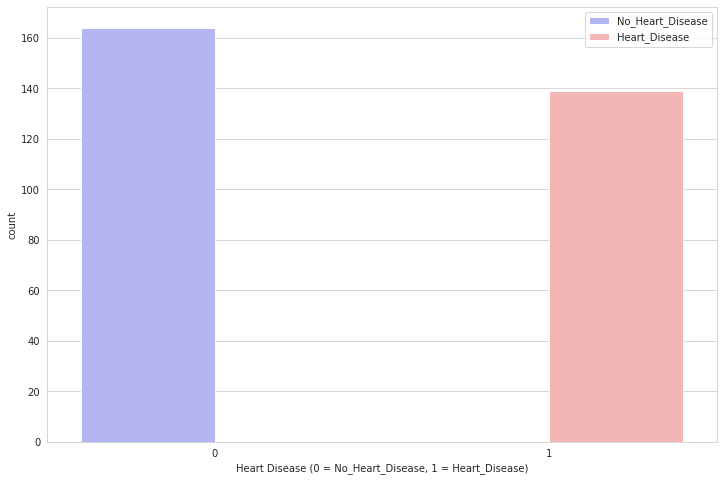

In [68]:
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(x="Heart_Disease_Status",hue = "Heart_Disease_Status", data=cland_df, palette="bwr")
plt.xlabel("Heart Disease (0 = No_Heart_Disease, 1 = Heart_Disease)")
plt.legend(["No_Heart_Disease","Heart_Disease"])

plt.show()

**Summary_12 :** Cleveland dataset target class ("Heart_Disease_Status) is almost balanced.

# Analysis of Outliers in numeric parameters

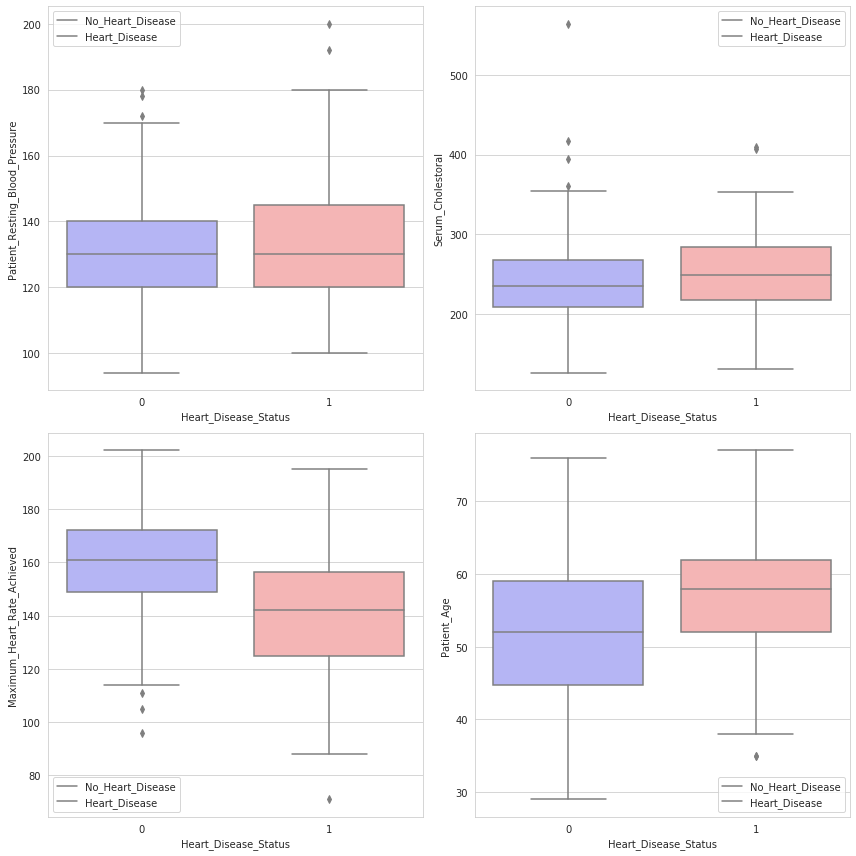

In [69]:
fs = ["Patient_Resting_Blood_Pressure", "Serum_Cholestoral", "Maximum_Heart_Rate_Achieved", "Patient_Age"]
fig, axes = plt.subplots(2, 2, figsize=(12,12))

for i, axi in enumerate(axes.flat):
    sns.boxplot(x="Heart_Disease_Status", y=fs[i], data=cland_df, palette="bwr", ax=axi);
    axi.set(ylabel=fs[i])
    axi.legend(["No_Heart_Disease", "Heart_Disease"])
      
fig.tight_layout()

**Summary_13 :** As per above data, it is difficult to identify Outliers, they can be valid extreme values. So no action for above outliers.

## Analysis of Correlation among different features

**What is correlation?**  
Correlation is the measure of how two features are, well, correlated.  
E.g. the month-of-the-year is correlated with the average daily temperature, and the hour-of-the-day is correlated with the amount of light outdoors.  
   Formalizing this mathematically, the definition of correlation usually used is Pearson’s R for a data sample (which results in a value in the range [-1,1]).
     
 
![Title](https://miro.medium.com/max/341/1*uOBToLtIFDfrNwnXLBv-7w.png)  

As per the above equation, Pearson’s R isn’t defined when the data is categorical; let’s assume that x is a color feature — how do you subtract yellow from the average of colors?  

One common option to handle this scenario is by first using one-hot encoding, and break each possible option of each categorical feature to 0-or-1 features. This will then allow the use of correlation, but it can easily become too complex to analyse. For example, one-hot encoding converts the 22 categorical features of the mushrooms data-set to a 112-features data-set.  

We will be using a measure of association between two categorical features **Cramér’s V**. It is based on a nominal variation of **Pearson’s Chi-Square Test**.  

Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)


In [0]:
def cramers_v(x, y):
  """
  Measure correlation among two categorical variables.
  """
  confusion_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [71]:
cland_df.select_dtypes(include=["category"]).columns

Index(['Patient_Gender', 'Chest_Pain_Type', 'Fasting_Blood_Sugar',
       'Resting_ECG', 'Exercise_Induced_Angina', 'Slope',
       'Thalium_Stress_Test_Result', 'Heart_Disease_Status'],
      dtype='object')

In [72]:
cland_df["Fasting_Blood_Sugar"].value_counts()

0.0    258
1.0     45
Name: Fasting_Blood_Sugar, dtype: int64

In [0]:
# Create new dataframe only for categorical variables

cramersv_df = pd.DataFrame(index=["Heart_Disease_Status"],columns=cland_df.select_dtypes(include=["category"]).columns)
columns = cland_df.select_dtypes(include=["category"]).columns

In [74]:
columns

Index(['Patient_Gender', 'Chest_Pain_Type', 'Fasting_Blood_Sugar',
       'Resting_ECG', 'Exercise_Induced_Angina', 'Slope',
       'Thalium_Stress_Test_Result', 'Heart_Disease_Status'],
      dtype='object')

In [0]:
for j in range(0,len(columns)):
    u = cramers_v(cland_df["Heart_Disease_Status"],cland_df[columns[j]])
    cramersv_df.loc[:,columns[j]] = u

In [76]:
cramersv_df.head()

,Patient_Gender,Chest_Pain_Type,Fasting_Blood_Sugar,Resting_ECG,Exercise_Induced_Angina,Slope,Thalium_Stress_Test_Result,Heart_Disease_Status
Heart_Disease_Status,0.263945,0.510832,0,0.163215,0.421617,0.380738,0.516864,0.993332


In [77]:
pd.crosstab(cland_df["Heart_Disease_Status"],cland_df["Fasting_Blood_Sugar"])

Fasting_Blood_Sugar,0.0,1.0
Heart_Disease_Status,,
0,141,23
1,117,22


In [78]:
pd.crosstab(cland_df["Heart_Disease_Status"],cland_df["Chest_Pain_Type"])

Chest_Pain_Type,1.0,2.0,3.0,4.0
Heart_Disease_Status,,,,
0,16,41,68,39
1,7,9,18,105


In [79]:
pd.crosstab(cland_df["Heart_Disease_Status"],cland_df["Patient_Gender"])

Patient_Gender,0.0,1.0
Heart_Disease_Status,,
0,72,92
1,25,114


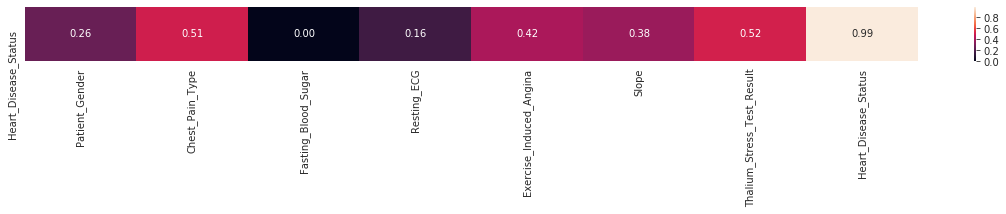

In [80]:
cramersv_df.fillna(value=0.0,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(cramersv_df,annot=True,fmt=".2f")
plt.show()

Trends from above analysis:  

**Trend_1 :** "Thalium_Stress_Test_Result", "Chest_Pain_Type" and "Exercise_Induced_Angina" are highly correlated with Heart_Disease_Status.  
**Trend_2 :** "Fasting_Blood_Sugar" are not/least related with Heart_Disease_Status.

In [81]:
cland_df.isna().any()

Patient_Age                       False
Patient_Gender                    False
Chest_Pain_Type                   False
Patient_Resting_Blood_Pressure    False
Serum_Cholestoral                 False
Fasting_Blood_Sugar               False
Resting_ECG                       False
Maximum_Heart_Rate_Achieved       False
Exercise_Induced_Angina           False
Old_Peak                          False
Slope                             False
No_of_Major_Colored_Vessels       False
Thalium_Stress_Test_Result        False
Heart_Disease_Status              False
dtype: bool

Copy all numeric features as cland_df_numeric for correlation study.  
Analysis of correlation among numeric features for Heart Disease Status.

In [0]:
cland_df_numeric = cland_df.select_dtypes(exclude=["category"]).copy()

Text(0.5, 68.09375, 'Numeric Features')

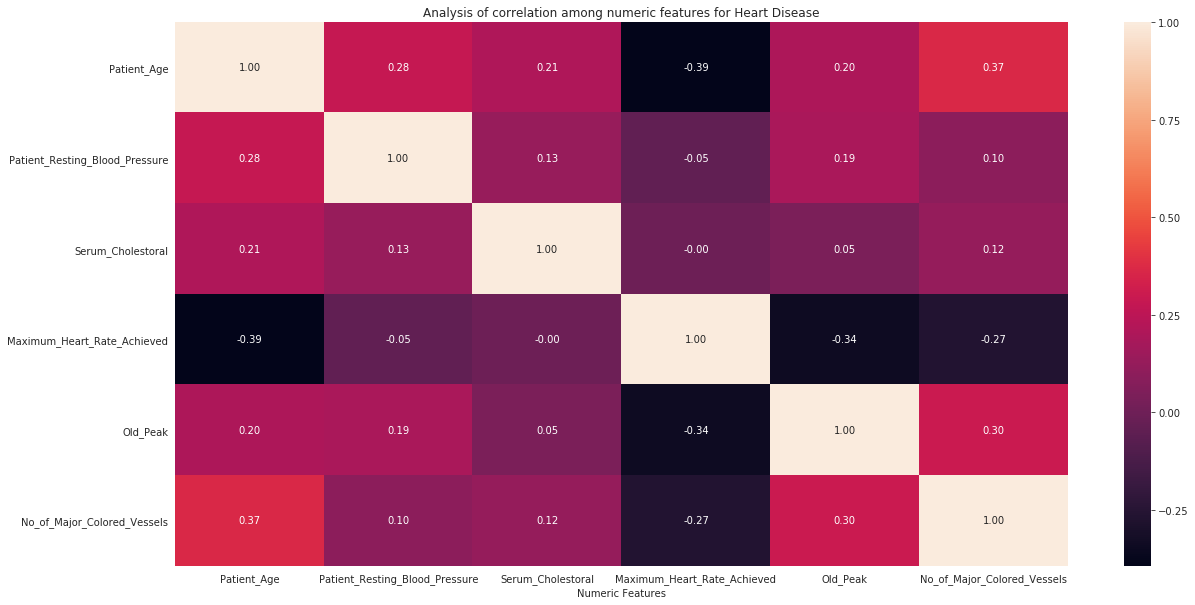

In [83]:
plt.figure(figsize=(20,10))

# Add title
plt.title("Analysis of correlation among numeric features for Heart Disease")
# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=cland_df_numeric.corr(), annot=True, fmt = ".2f")

# Add label for horizontal axis
plt.xlabel("Numeric Features")

**Trend_3 :** "No_of_Major_Colored_Vessels" and "Patient_Resting_Blood_Pressure" are highly correlated with Patient_Age.  
**Trend_4 :** "Maximum_Heart_Rate_Achieved" is negatively correlated with Patient_Age.


#### Patient_Gender and Heart_Disease_Status

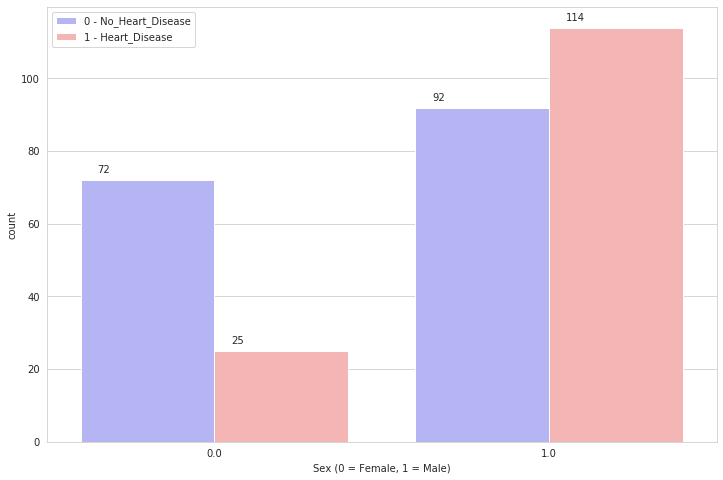

In [84]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Patient_Gender",hue="Heart_Disease_Status",data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_5 :** Male Patients are suffering more with Heart Disease.  

#### No_of_Major_Colored_Vessels and Heart_Disease_Status

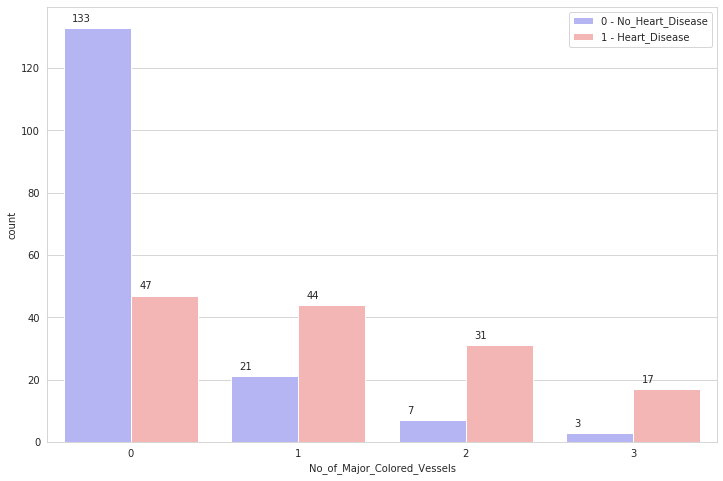

In [85]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="No_of_Major_Colored_Vessels",hue="Heart_Disease_Status", data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_6 :** More Number of major vessels colored by flourosopy are suffering more with Heart Disease respective to non heart disease. So if any of the vessels is colored, there are more chances of having Heart Disease.  

#### Resting_ECG and Heart_Disease_Status

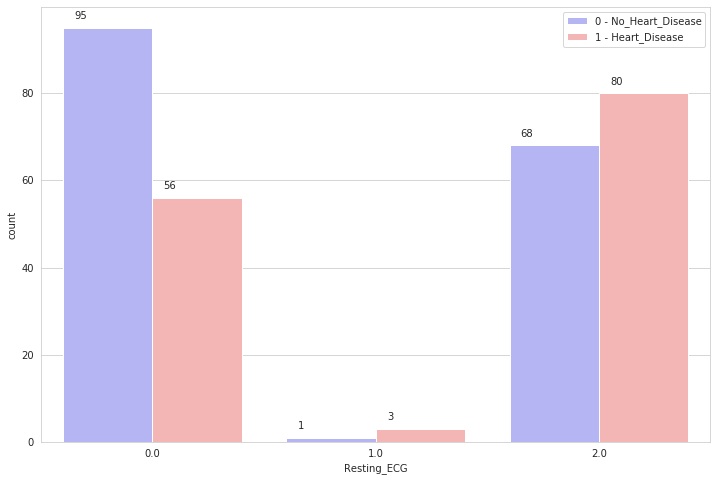

In [86]:
plt.figure(figsize=(12,8))

ax=sns.countplot(x="Resting_ECG",hue="Heart_Disease_Status", data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_7 :** Resting_ECG is Normal then there are more chances that Patient is not actually not suffering from Heart Disease. If Resting_ECG is not Normal and value is 2, then high chances of Heart Disease. This should be reevaluated with more data.

#### Patient_Age and Heart_Disease_Status

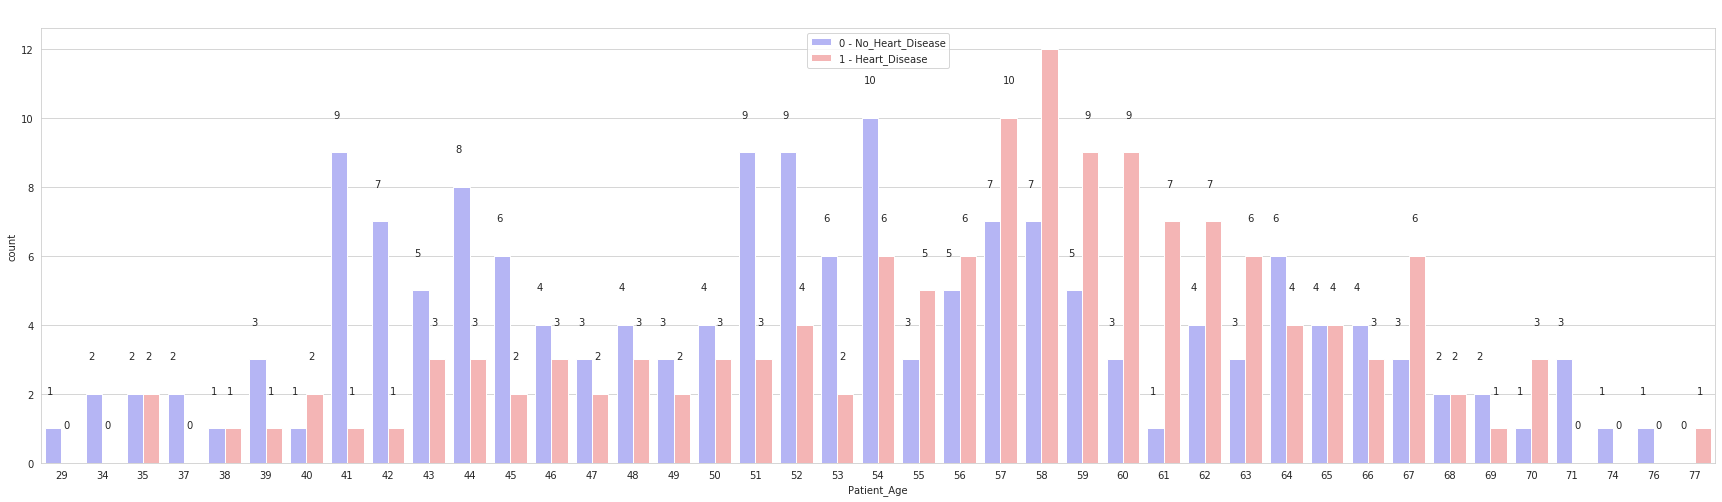

In [87]:
plt.figure(figsize=(30,8))

ax=sns.countplot(x="Patient_Age",hue="Heart_Disease_Status", data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+1))
plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_8 :** Higher the age, high chances of Heart Disease. Age = 55, can be treated as threshold for this trend.   
#### Chest_Pain_Type and Heart_Disease_Status

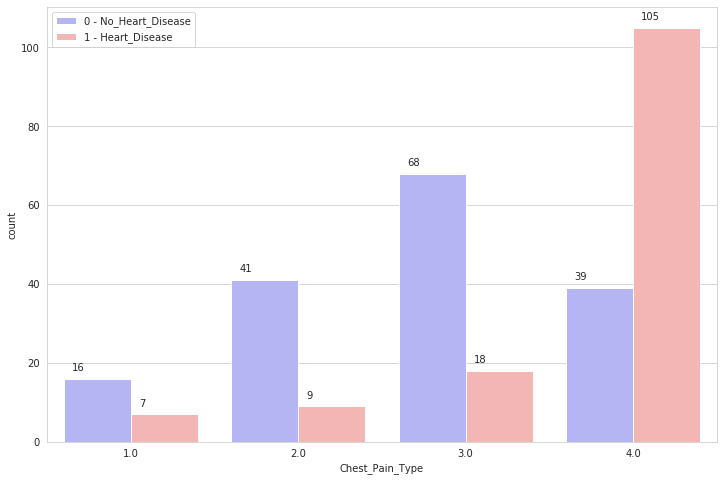

In [88]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Chest_Pain_Type",hue="Heart_Disease_Status",data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_9 :** Chest_Pain_Type = 4 is very sure indication of Heart Disease.    
#### Slope and Heart_Disease_Status

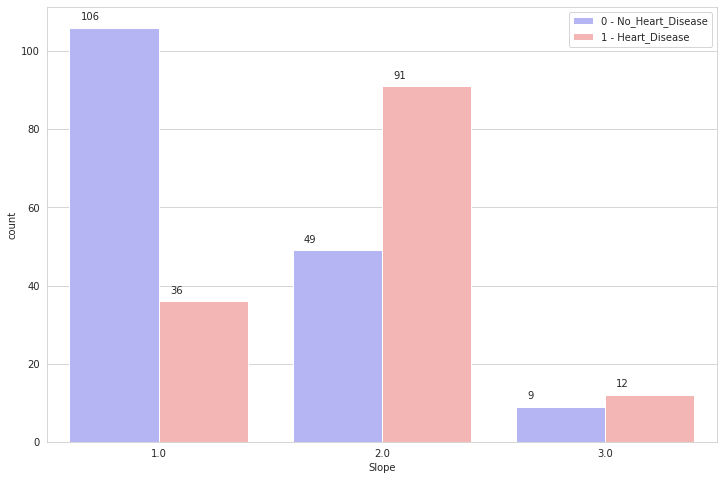

In [89]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Slope",hue="Heart_Disease_Status",data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_10 :** Slope = 2 is a high indication of Heart Disease.  
#### Thalium_Stress_Test_Result and Heart_Disease_Status

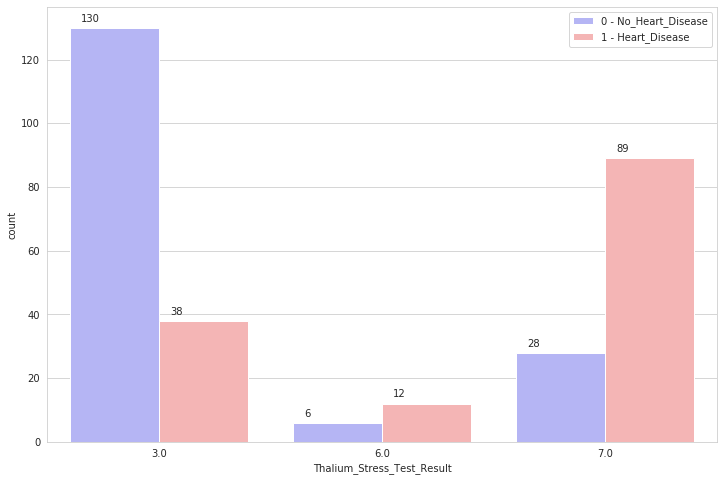

In [90]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Thalium_Stress_Test_Result",hue="Heart_Disease_Status",data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_11 :** Thalium_Stress_Test_Result = 6 and 7 are better indication of Heart Disease.  

#### Fasting_Blood_Sugar and Heart_Disease_Status

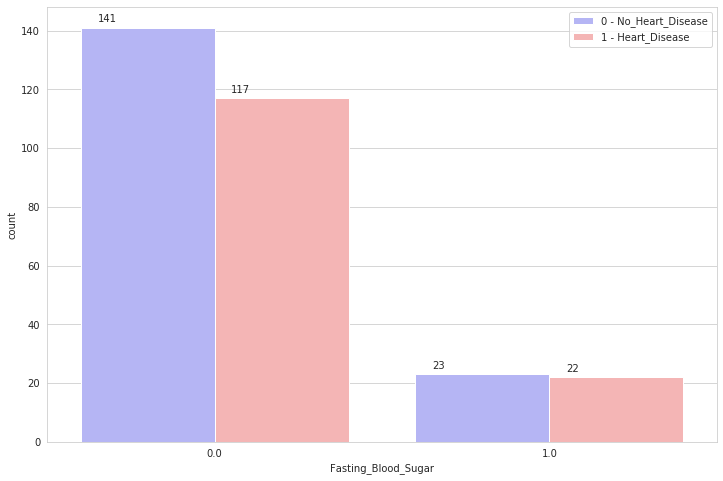

In [91]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Fasting_Blood_Sugar",hue="Heart_Disease_Status",data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_12 :** Fasting_Blood_Sugar is not a good indication for identifying the symptoms of Heart Disease.  
#### Exercise_Induced_Angina and Heart_Disease_Status

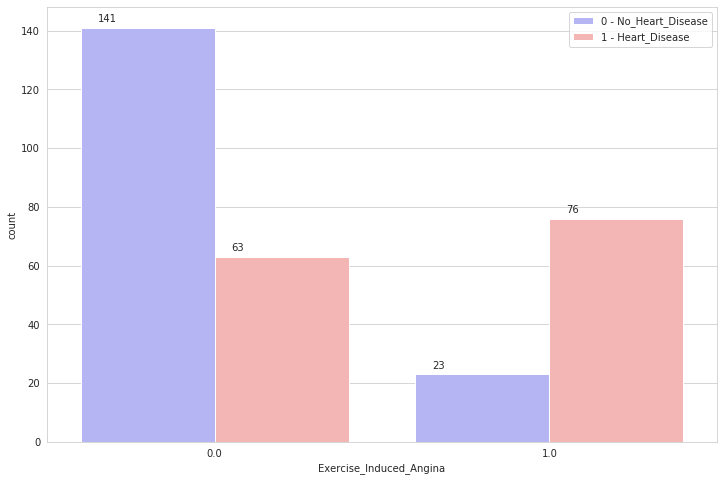

In [92]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Exercise_Induced_Angina",hue="Heart_Disease_Status", data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_13 :** Exercise Induced Angina with value as 1, is a strong indication for Heart Disease.  
#### Patient_Resting_Blood_Pressure and Heart_Disease_Status

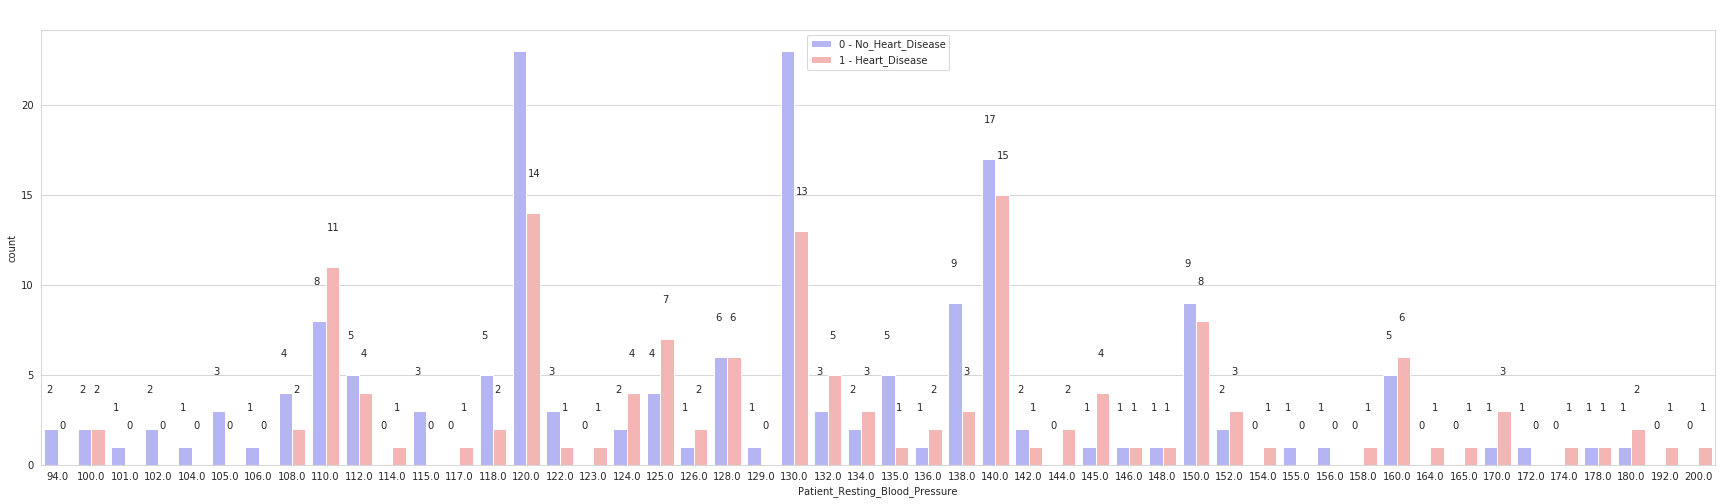

In [93]:
plt.figure(figsize=(30,8))
ax=sns.countplot(x="Patient_Resting_Blood_Pressure",hue="Heart_Disease_Status", data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_14 :** Patient's Resting Blood Pressure > 160 is an indication of Heart Disease.   
#### Old_Peak and Heart_Disease_Status

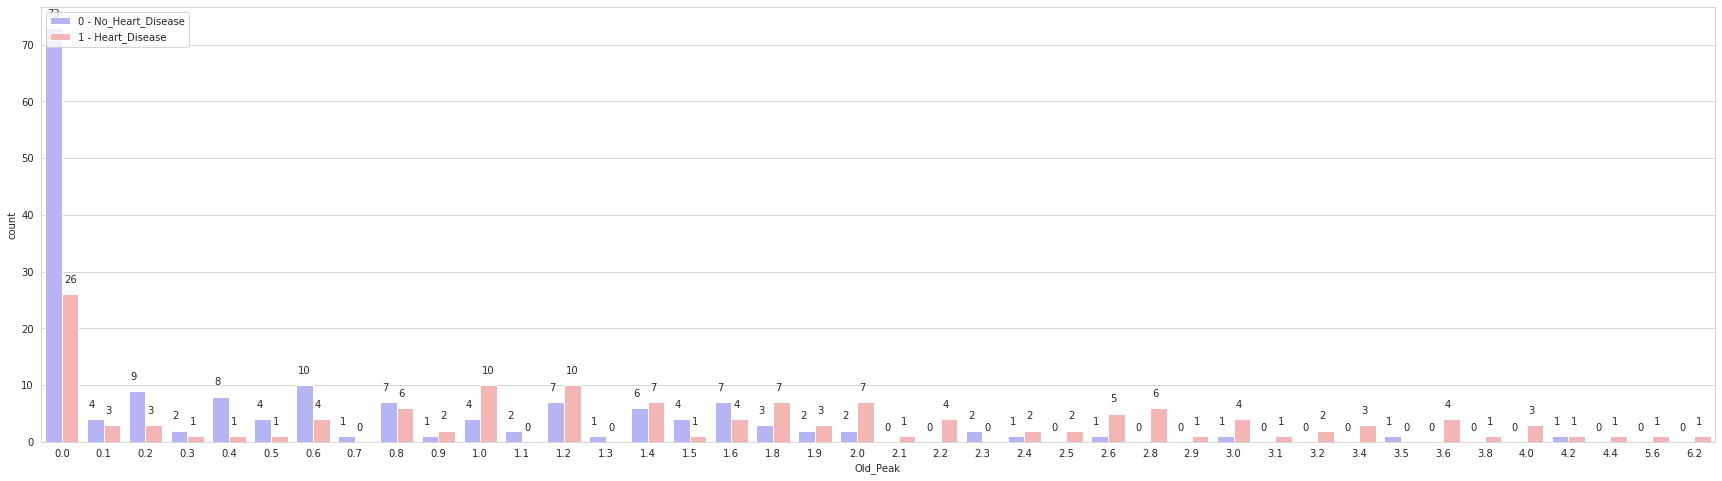

In [94]:
plt.figure(figsize=(30,8))
ax=sns.countplot(x="Old_Peak",hue="Heart_Disease_Status",data=cland_df, palette="bwr")
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate("{}".format(int(patch_height)), (p.get_x()+0.05, patch_height+2))

plt.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_15 :** Old_Peak >= 0.9 is an indication of Heart Disease.

## Bi-Variate Analysis, impact of patient age with other features and combined impact on Heart_Disease_Status (target feature)

In [95]:
cland_df["Heart_Disease_Status"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

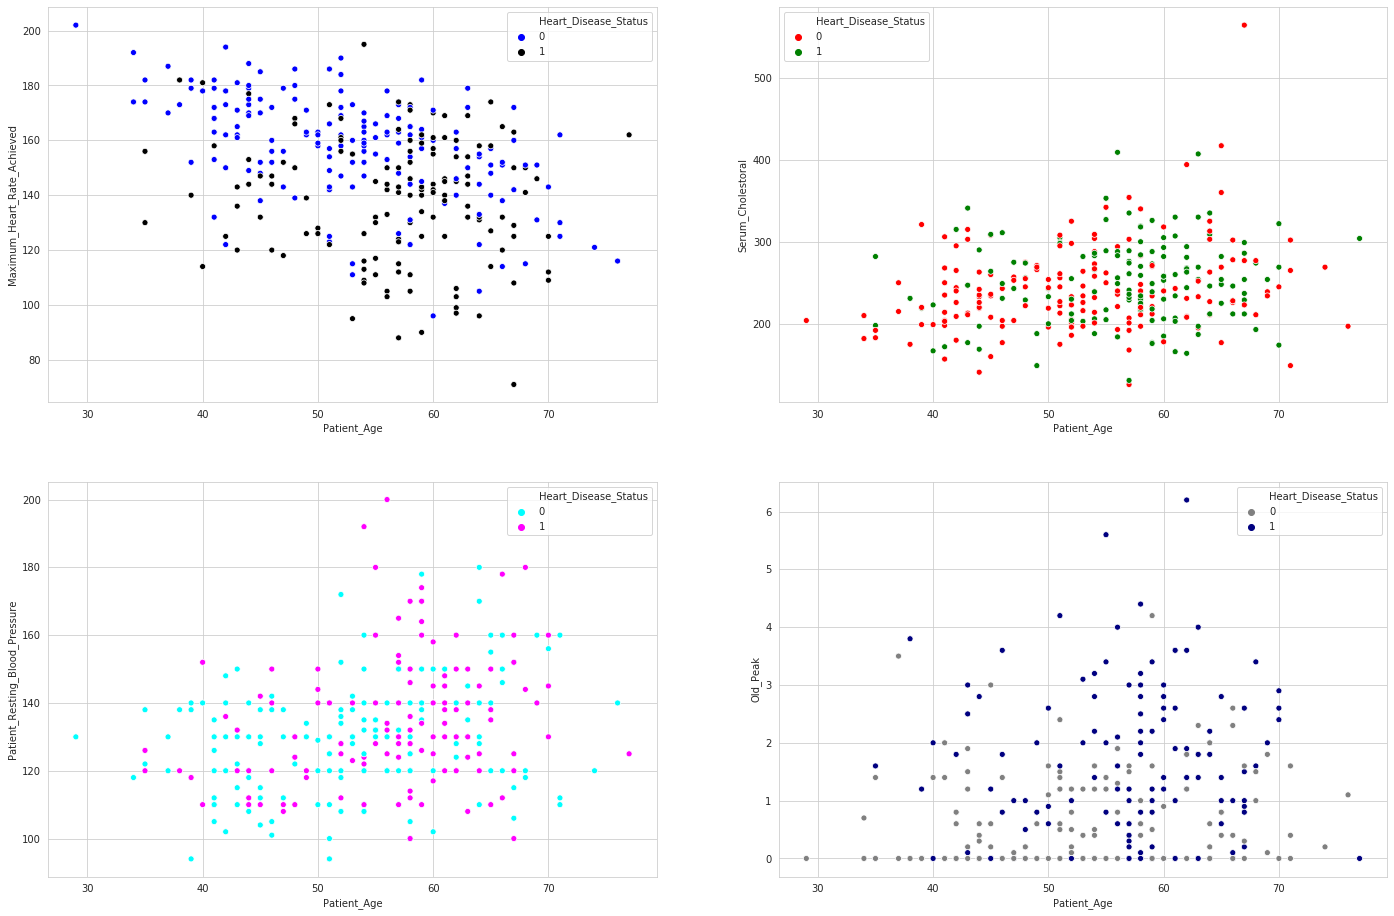

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(24,16))

fs = ["Maximum_Heart_Rate_Achieved", "Serum_Cholestoral", "Patient_Resting_Blood_Pressure", "Old_Peak"]
colors = ["blue", "black", "red", "green", "cyan", "fuchsia", "grey", "navy"]

for i, axi in enumerate(axes.flat):
    sns.scatterplot(x=cland_df.Patient_Age, y=cland_df[fs[i]] , ax=axi, hue = cland_df["Heart_Disease_Status"], palette=[colors[i*2],colors[i*2+1]]) 
    axi.set(ylabel=fs[i])
    handles, labels = axi.get_legend_handles_labels()
    axi.legend(handles, labels)
plt.show()

**Trend_16 :** "Maximum_Heart_Rate_Achieved", "Serum_Cholestoral" and "Patient_Resting_Blood_Pressure" seems correlated with Patient Age and Heart Disease Status.

In [97]:
cland_df.columns

Index(['Patient_Age', 'Patient_Gender', 'Chest_Pain_Type',
       'Patient_Resting_Blood_Pressure', 'Serum_Cholestoral',
       'Fasting_Blood_Sugar', 'Resting_ECG', 'Maximum_Heart_Rate_Achieved',
       'Exercise_Induced_Angina', 'Old_Peak', 'Slope',
       'No_of_Major_Colored_Vessels', 'Thalium_Stress_Test_Result',
       'Heart_Disease_Status'],
      dtype='object')

### Frequency Distribution of Age with respect to Heart Disease Status

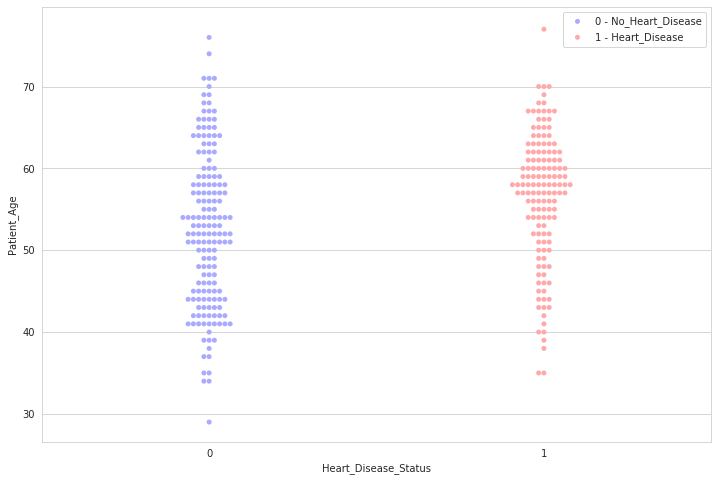

In [98]:
plt.figure(figsize=(12,8))
ax = sns.swarmplot(data=cland_df, x="Heart_Disease_Status", y="Patient_Age", palette="bwr")
ax.legend(["0 - No_Heart_Disease", "1 - Heart_Disease"])
plt.show()

**Trend_17 :** Higher the age (> 56-58), more number of Heart disease patients.

In [99]:
cland_df.isna().any().any()

False

> Create a backup of cland_df as cland_df_backup

In [0]:
cland_df_backup = cland_df.copy()

In [101]:
cland_df.shape

(303, 14)

In [0]:
# Getting features and target
X = cland_df.drop(["Heart_Disease_Status"], axis=1)
y = cland_df["Heart_Disease_Status"]

### Modeling 

Size of data set is very small, so instead if dividing data into train and test, I will be using k-fold cross validation where k is 5.

#### Logistic Regression with cross validation

In [103]:
lr_model = LogisticRegression()
lr_predictions = cross_val_predict(lr_model, X, y, cv=5)

tn, fp, fn, tp = confusion_matrix(y, lr_predictions).ravel()

print(confusion_matrix(y, lr_predictions))
print("\n")
print(f"True Negative : {tn} False Positive : {fp} False Negative : {fn} True Positive : {tp}")

# Accuracy metrics is "Recall"
lr_scores = cross_val_score(lr_model, X, y, scoring="recall", cv=5)
print("recall:", lr_scores.mean())

[[142  22]
 [ 29 110]]


True Negative : 142 False Positive : 22 False Negative : 29 True Positive : 110
recall: 0.7904761904761904


#### Random Forest

In [104]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_predictions = cross_val_predict(rf_model, X, y, cv=5)

tn, fp, fn, tp = confusion_matrix(y, rf_predictions).ravel()

print(confusion_matrix(y, rf_predictions))
print("\n")
print(f"True Negative : {tn} False Positive : {fp} False Negative : {fn} True Positive : {tp}")


rf_scores = cross_val_score(rf_model, X, y, scoring="recall", cv=5)
print("recall:", rf_scores.mean())

[[143  21]
 [ 28 111]]


True Negative : 143 False Positive : 21 False Negative : 28 True Positive : 111
recall: 0.7904761904761904


**Summary_14 :** "False Negative" are more with Random Forest i.e. With RF, we will be predicting a Heart Patient as Non-Heart Patient, which is certainly not good. Moving forward with Logistic Regression.

In [105]:
cland_df.dtypes

Patient_Age                           int8
Patient_Gender                    category
Chest_Pain_Type                   category
Patient_Resting_Blood_Pressure     float64
Serum_Cholestoral                  float64
Fasting_Blood_Sugar               category
Resting_ECG                       category
Maximum_Heart_Rate_Achieved        float64
Exercise_Induced_Angina           category
Old_Peak                           float64
Slope                             category
No_of_Major_Colored_Vessels           int8
Thalium_Stress_Test_Result        category
Heart_Disease_Status              category
dtype: object

#### Encode Categorical Features

In [106]:
cland_df["Chest_Pain_Type"].unique()

[1.0, 4.0, 3.0, 2.0]
Categories (4, float64): [1.0, 4.0, 3.0, 2.0]

In [0]:
gender = pd.get_dummies(cland_df["Patient_Gender"], prefix = "pg", drop_first=True)
cpt = pd.get_dummies(cland_df["Chest_Pain_Type"], prefix = "cpt", drop_first=True)
fbs = pd.get_dummies(cland_df["Fasting_Blood_Sugar"], prefix = "fbs", drop_first=True)
recg = pd.get_dummies(cland_df["Resting_ECG"], prefix = "recg", drop_first=True)
eia = pd.get_dummies(cland_df["Exercise_Induced_Angina"], prefix = "eia", drop_first=True)
slop = pd.get_dummies(cland_df["Slope"], prefix = "slop", drop_first=True)
thal = pd.get_dummies(cland_df["Thalium_Stress_Test_Result"], prefix = "thal", drop_first=True)

In [108]:
frames = [cland_df, gender, cpt, fbs, recg, eia, slop, thal]
df = pd.concat(frames, axis = 1)
df.head()

,Patient_Age,Patient_Gender,Chest_Pain_Type,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope,No_of_Major_Colored_Vessels,Thalium_Stress_Test_Result,Heart_Disease_Status,pg_1.0,cpt_2.0,cpt_3.0,cpt_4.0,fbs_1.0,recg_1.0,recg_2.0,eia_1.0,slop_2.0,slop_3.0,thal_6.0,thal_7.0
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6.0,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,3.0,1,1,0,0,1,0,0,1,1,1,0,0,0
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,7.0,1,1,0,0,1,0,0,1,1,1,0,0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,3.0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,3.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [109]:
df.shape

(303, 26)

Drop original features as we have already encoded them using one-hot-encoding.

In [110]:
df = df.drop(columns = ["Patient_Gender", "Chest_Pain_Type", "Fasting_Blood_Sugar", "Resting_ECG", "Exercise_Induced_Angina", "Slope", "Thalium_Stress_Test_Result"])
df.head()

,Patient_Age,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Maximum_Heart_Rate_Achieved,Old_Peak,No_of_Major_Colored_Vessels,Heart_Disease_Status,pg_1.0,cpt_2.0,cpt_3.0,cpt_4.0,fbs_1.0,recg_1.0,recg_2.0,eia_1.0,slop_2.0,slop_3.0,thal_6.0,thal_7.0
0,63,145.0,233.0,150.0,2.3,0,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67,160.0,286.0,108.0,1.5,3,1,1,0,0,1,0,0,1,1,1,0,0,0
2,67,120.0,229.0,129.0,2.6,2,1,1,0,0,1,0,0,1,1,1,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [0]:
# Getting features and target
X = df.drop(["Heart_Disease_Status"], axis=1)
y = df["Heart_Disease_Status"]

### Logistic Regression after dummy encoding

In [112]:
lr_model = LogisticRegression()
lr_predictions = cross_val_predict(lr_model, X, y, cv=5)

tn, fp, fn, tp = confusion_matrix(y, lr_predictions).ravel()

print(confusion_matrix(y, lr_predictions))
print("\n")
print(f"True Negative : {tn} False Positive : {fp} False Negative : {fn} True Positive : {tp}")

lr_scores = cross_val_score(lr_model, X, y, scoring="recall", cv=5)
print("recall:", lr_scores.mean())

[[144  20]
 [ 30 109]]


True Negative : 144 False Positive : 20 False Negative : 30 True Positive : 109
recall: 0.7830687830687831


In [113]:
df.head()

,Patient_Age,Patient_Resting_Blood_Pressure,Serum_Cholestoral,Maximum_Heart_Rate_Achieved,Old_Peak,No_of_Major_Colored_Vessels,Heart_Disease_Status,pg_1.0,cpt_2.0,cpt_3.0,cpt_4.0,fbs_1.0,recg_1.0,recg_2.0,eia_1.0,slop_2.0,slop_3.0,thal_6.0,thal_7.0
0,63,145.0,233.0,150.0,2.3,0,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67,160.0,286.0,108.0,1.5,3,1,1,0,0,1,0,0,1,1,1,0,0,0
2,67,120.0,229.0,129.0,2.6,2,1,1,0,0,1,0,0,1,1,1,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,0,0,1,0,0,0,0,1,0,0,0,0,0


# Normalize the data

In [0]:
X_norm = minmax_scale(X)

### Logistic Regression after dummy encoding and Normalization

In [115]:
lr_model = LogisticRegression(solver="liblinear")

lr_predictions = cross_val_predict(lr_model, X_norm, y, cv=5)

tn, fp, fn, tp = confusion_matrix(y, lr_predictions).ravel()

print(confusion_matrix(y, lr_predictions))
print("\n")
print(f"True Negative : {tn} False Positive : {fp} False Negative : {fn} True Positive : {tp}")

lr_scores = cross_val_score(lr_model, X_norm, y, scoring="recall", cv=5)

print("recall:", lr_scores.mean())

[[139  25]
 [ 25 114]]


True Negative : 139 False Positive : 25 False Negative : 25 True Positive : 114
recall: 0.8193121693121693


In [116]:
f1 = f1_score(y, lr_predictions)
f1

0.8201438848920863

## **Summary_15 :** FNs are minimum with this model. Overall f1-score is also good.

Creating Single Logistic Regression Model to understand LR's coefficients for model interpretation.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 2019)

In [0]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Do predictions on train & test set

y_train_predicted = lr.predict(X_train)

y_test_predicted = lr.predict(X_test)

In [119]:
recall_score(y_test, y_test_predicted)

0.7857142857142857

In [120]:
lr.intercept_

array([-1.68831062])

In [121]:
X.columns

Index(['Patient_Age', 'Patient_Resting_Blood_Pressure', 'Serum_Cholestoral',
       'Maximum_Heart_Rate_Achieved', 'Old_Peak',
       'No_of_Major_Colored_Vessels', 'pg_1.0', 'cpt_2.0', 'cpt_3.0',
       'cpt_4.0', 'fbs_1.0', 'recg_1.0', 'recg_2.0', 'eia_1.0', 'slop_2.0',
       'slop_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [122]:
coef_dict = dict(zip(X.columns, lr.coef_[0,:]))
coef_dict

{'Maximum_Heart_Rate_Achieved': -1.7712381844576868,
 'No_of_Major_Colored_Vessels': 2.0939440963986065,
 'Old_Peak': 0.9096586138867945,
 'Patient_Age': -0.22596042172569353,
 'Patient_Resting_Blood_Pressure': 0.5292048885228555,
 'Serum_Cholestoral': 0.24708667499691286,
 'cpt_2.0': -0.44196282004840254,
 'cpt_3.0': -0.6689618138823236,
 'cpt_4.0': 0.7105057534858484,
 'eia_1.0': 0.7334709367026204,
 'fbs_1.0': 0.19621686832796967,
 'pg_1.0': 0.8447114543744462,
 'recg_1.0': 0.2531843689194935,
 'recg_2.0': 0.2017000325619711,
 'slop_2.0': 0.8510022176112206,
 'slop_3.0': 0.3762905861122322,
 'thal_6.0': 0.2543504196183167,
 'thal_7.0': 0.9701764044157667}

To Be Updated

In [0]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

# Do predictions on train & test set

y_train_predicted = rf_clf.predict(X_train)
y_test_predicted = rf_clf.predict(X_test)

In [124]:
rf_clf.feature_importances_

array([0.09375703, 0.07373328, 0.07926317, 0.11647559, 0.11039352,
       0.13864392, 0.03709528, 0.01514122, 0.01962807, 0.08259253,
       0.00992544, 0.00057592, 0.02337888, 0.07253326, 0.04317084,
       0.00648442, 0.00887636, 0.06833127])

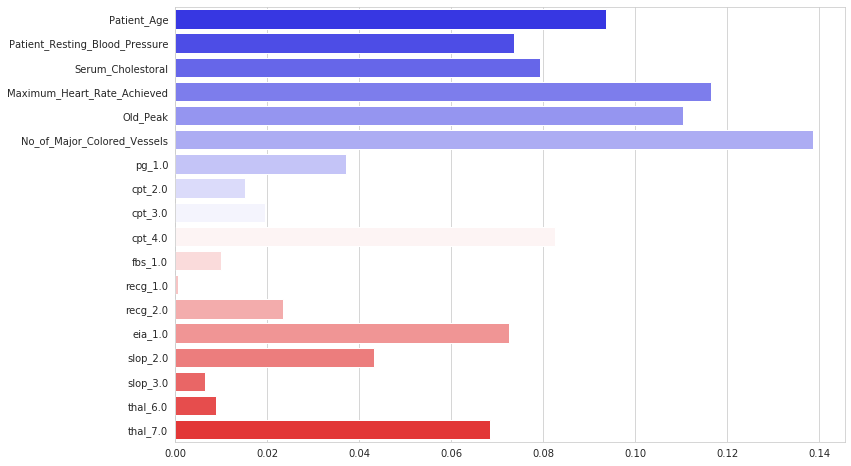

In [125]:
cols = X.columns
rf_clf.feature_importances_
plt.figure(figsize=(12,8))
sns.barplot(y=cols , x=rf_clf.feature_importances_, palette="bwr")

To Be Updated

# Conclusion : 

## Trends 
- Trend_1 : "Thalium_Stress_Test_Result", "Chest_Pain_Type" and "Exercise_Induced_Angina" are highly correlated with Heart_Disease_Status.  
- Trend_2 : "Fasting_Blood_Sugar" are not/least related with Heart_Disease_Status.  
- Trend_3 : "No_of_Major_Colored_Vessels" and "Patient_Resting_Blood_Pressure" are highly correlated with Patient_Age.  
- Trend_4 : "Maximum_Heart_Rate_Achieved" is negatively correlated with Patient_Age.  
- Trend_5 : Male Patients are suffering more with Heart Disease.  
- Trend_6 : More Number of major vessels colored by flourosopy are suffering more with Heart Disease respective to non heart disease. So if any of the vessels is colored, there are more chances of having Heart Disease.  
- Trend_7 : Resting_ECG is Normal then there are more chances that Patient is not actually not suffering from Heart Disease. If Resting_ECG is not Normal and value is 2, then high chances of Heart Disease. This should be reevaluated with more data.  
- Trend_8 : Higher the age, high chances of Heart Disease. Age = 55, can be treated as threshold for this trend.  
- Trend_9 : Chest_Pain_Type = 4 is very sure indication of Heart Disease.  
- Trend_10 : Slope = 2 is a high indication of Heart Disease.  
- Trend_11 : Thalium_Stress_Test_Result = 6 and 7 are better indication of Heart Disease.  
- Trend_12 : Fasting_Blood_Sugar is not a good indication for identifying the symptoms of Heart Disease.  
- Trend_13 : Exercise Induced Angina with value as 1, is a strong indication for Heart Disease.  
- Trend_14 : Patient's Resting Blood Pressure > 160 is an indication of Heart Disease.  
- Trend_15 : Old_Peak >= 0.9 is an indication of Heart Disease.  
- Trend_16 : "Maximum_Heart_Rate_Achieved", "Serum_Cholestoral" and "Patient_Resting_Blood_Pressure" seems correlated with Patient Age and Heart Disease Status.  
- Trend_17 : Higher the age (> 56-58), more number of Heart disease patients.  

## Summary  
- Summary_1 : All four data files are in csv format.  
- Summary_2 : All four data files have 14 features.  
- Summary_3 : Hungarian dataset has only two values (0 & 1) for "Heart_Disease_Status" target variable. While all remaining three dataset has four (0,1,2,3) values.  
- Summary_4 : Switzerland dataset has only 3 values for "No_of_Major_Colored_Vessels".  
- Summary_5 : Hungarian dataset has only 2 values for "No_of_Major_Colored_Vessels".  
- Summary_6 : Virginia dataset has only 1 value for "No_of_Major_Colored_Vessels".  
- Summary_7 : Initial Idea was to use unprocessed data i.e. cleveland.data and all. As per Warning file, present at (https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) cleveland.data appears to be corrupted, so we will be using processed.cleveland.data and similar files from Switzerland, Hungry and VA.  
- Summary_8 : Since we are using processed.*.data files, so we will be concentrating only on 13+! features.  
- Summary_9 : As per above analysis of Switzerland, Hungarian and VA data analysis, we found features like No_of_Major_Colored_Vessels, Thalium_Stress_Test_Result, Fasting_Blood_Sugar, and slope have major missing values upto 99%. As we can not impute these features with 70-99% missing values, so we can not use these datasets.  
- Summary_10 : My approach will be to use processed.cleveland.data first and try to figure out important parameters out of existing 13 independent features.  
- Summary_11 : Since size of cleveland data is very small only 303 records, so we will be dividing the Heart_Disease_Status into two categories e.g. 0 - Healthy and 1 - Not Healthy. It means if any of the vessels (Total 4 in human body) have >50% narrowing then it is not healthy.  
- Summary_12 : Cleveland dataset target class ("Heart_Disease_Status) is almost balanced.  
- Summary_13 : As per above data, it is difficult to identify Outliers, they can be valid extreme values. So no action for above outliers.  
- Summary_14 : "False Negative" are more with Random Forest i.e. With RF, we will be predicting a Heart Patient as Non-Heart Patient, which is certainly not good. Moving forward with Logistic Regression.  
- Summary_15 : FNs are minimum with Logistic Regression with normalized data model. Overall f1-score is also good. 

# References  
1. Analysis of Correlation Ref: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9